In [38]:
# Read in our dataset from "Data_Preprocessing.ipynb" kernel
# This line should work if everything is setup correctly
lr_data = clean_data
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 731008 to 272925
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Flow Duration      1048575 non-null  int64  
 2   TotLen Fwd Pkts    1048575 non-null  int64  
 3   Fwd Pkt Len Max    1048575 non-null  int64  
 4   Fwd Pkt Len Min    1048575 non-null  int64  
 5   Fwd Pkt Len Mean   1048575 non-null  float64
 6   Bwd Pkt Len Max    1048575 non-null  int64  
 7   Bwd Pkt Len Min    1048575 non-null  int64  
 8   Bwd Pkt Len Mean   1048575 non-null  float64
 9   Flow IAT Mean      1048575 non-null  float64
 10  Bwd IAT Tot        1048575 non-null  int64  
 11  Bwd IAT Mean       1048575 non-null  float64
 12  Bwd IAT Max        1048575 non-null  int64  
 13  Bwd IAT Min        1048575 non-null  int64  
 14  Fwd PSH Flags      1048575 non-null  int64  
 15  Pkt Len Var        1048575 n

In [39]:
# Show how many observations are contained within each of the three possible labels
print(lr_data["Label"].value_counts())

0    667626
1    193360
2    187589
Name: Label, dtype: int64


In [40]:
X = lr_data
y = lr_data["Label"].astype(int)
X = X.drop(columns="Label")

In [41]:
str_feats = []
for column_name, column_value in X.items():
    if type(column_value[1]) == str:
        str_feats.append(column_name)
        
num_feats = X.columns.difference(str_feats)
df_feats = X[num_feats]

<Axes: title={'center': 'Pearson Correlation of Features'}>

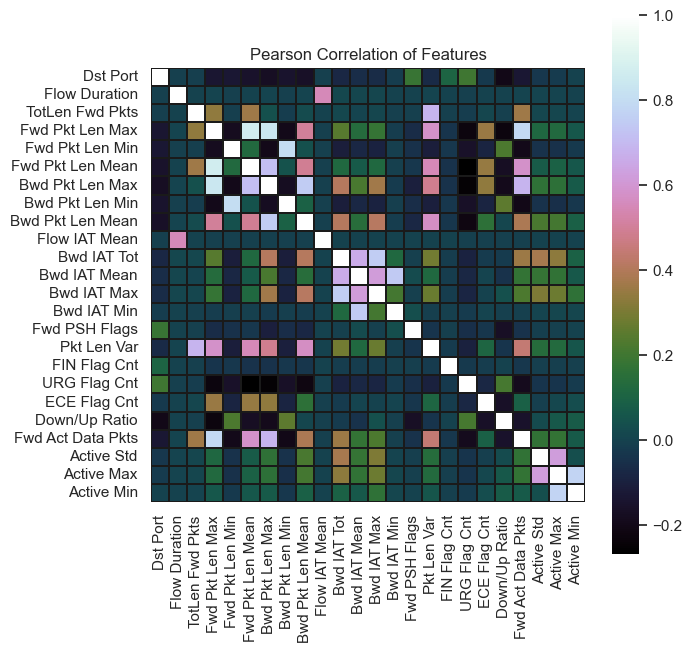

In [42]:
f, ax = plt.subplots(figsize=(7, 7))
plt.title("Pearson Correlation of Features")
sns.heatmap(df_feats.astype(float).corr(), linewidths=0.05, vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=False)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(891288, 24) (157287, 24) (891288,) (157287,)


In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_train = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
#X_test = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [45]:
model = make_pipeline(StandardScaler(), LogisticRegression())

set_config(display='diagram')
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [46]:
print("Train:", len(X_train), "Test:", len(X_test))
print(y_train)

Train: 891288 Test: 157287
997576    0
211143    2
558593    0
690783    0
119172    1
         ..
176388    1
955485    0
679655    0
825494    0
521313    0
Name: Label, Length: 891288, dtype: int64


In [47]:
# C is the standardization parameter that penalizes extreme values
log_reg = LogisticRegression(random_state=42, C=0.9, fit_intercept=True, max_iter=2000).fit(X_train, y_train)
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 3.97654667e+01 -4.34885460e-01  1.43468696e+00  5.74242593e+00
   8.44999951e-01  1.84635075e+01  4.71625502e+00  2.74020895e-01
   6.17771957e+00  2.30486646e-01  1.22431560e+01  1.24651815e+01
   5.00138863e+00  1.67499801e+01  2.80528257e+00 -8.37373154e-01
   7.02118744e-01  3.64920359e-01  1.00677839e-01 -1.74814482e+00
  -2.59768593e-02  4.43677209e-01  1.18774161e+00  1.08884859e+00]
 [-2.42849083e+01  1.74588641e-01 -1.16422707e+00 -1.92824972e+01
  -8.73126122e-01 -2.80847993e+01 -1.44109547e+01 -3.03862527e-01
  -5.40219704e-01 -9.20732931e-02 -1.18409304e+01 -1.25081083e+01
  -4.62242838e+00 -1.67084978e+01 -1.10829316e-02 -5.62973889e-01
  -7.06246938e-01 -4.25979864e+00 -1.03335791e-01  3.32649526e+00
  -4.06849934e+00 -4.17916678e-02 -2.17762581e-01 -2.49665316e-01]
 [-1.54805584e+01  2.60296819e-01 -2.70459889e-01  1.35400713e+01
   2.81261714e-02  9.62129183e+00  9.69469966e+00  2.98416321e-02
  -5.63749986e+00 -1.38413353e-01 -4.02225531e-01  4.29268058e-02
  -3.789

In [48]:
y_pred = log_reg.predict(X_test)

In [49]:
log_reg.score(X_test, y_test)

0.8135700979737677

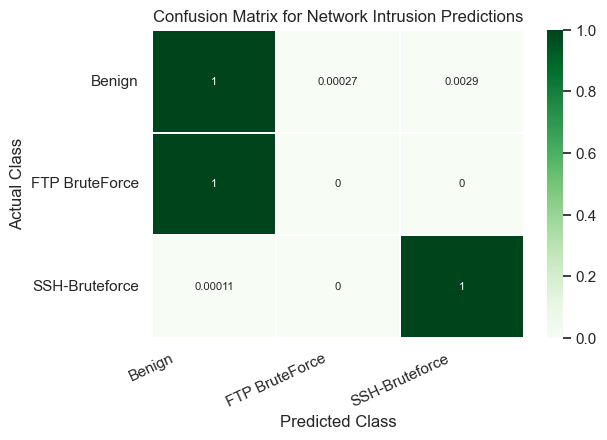

In [50]:
labels = ["Benign", "FTP BruteForce", "SSH-Bruteforce"]
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, annot_kws={'size':8}, cmap=plt.cm.Greens, linewidths=0.2)

tick_marks = np.arange(len(labels))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels, rotation=25)
plt.yticks(tick_marks2, labels, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Network Intrusion Predictions')
plt.show()

In [51]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Model Performance")
print("MAE: {}" .format(mae))
print("MSE: {}" .format(mse))
# The closer R2 is to 1, the better the model fit
print("R2: {}" .format(r2))

Model Performance
MAE: 0.1882863809469314
MSE: 0.19199933878832962
R2: 0.6831815120903175


In [52]:
print(y_test.iloc[0:5], y_pred[0:5])

477737    0
590153    0
167291    1
267501    2
290874    2
Name: Label, dtype: int64 [0 0 0 2 2]


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87    100144
           1       0.00      0.00      0.00     29004
           2       0.99      1.00      0.99     28139

    accuracy                           0.81    157287
   macro avg       0.59      0.67      0.62    157287
weighted avg       0.67      0.81      0.73    157287

